<a href="https://colab.research.google.com/github/cbobrien2027/psychopy_project/blob/main/psychoPyproject_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
#Allows for file upload
from google.colab import files
uploaded = files.upload()

Saving 463601_creatingimagesNEW_2024-05-12_00h41.30.327.csv to 463601_creatingimagesNEW_2024-05-12_00h41.30.327 (3).csv


In [70]:
#Allows access to csv file
#Import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

path = "463601_creatingimagesNEW_2024-05-12_00h41.30.327 (3).csv"
df = pd.read_csv(path)
df.columns
columns_list = df.columns

In [71]:
#Deletes unnecessary columns, collected by psychopy
df.pop (columns_list [2])
for ii in range (48):
  if ii <= 32:
    df.pop (columns_list[ii + 5])
  else:
    df.pop (columns_list[ii + 7])

In [72]:
#https://www.tutorialspoint.com/how-to-delete-only-one-row-in-csv-with-python
#Removes the test trial data and blank row at the end
#The -0.2 accounts for the 0.2 wait period for the fixation square.
time_taken = df['Real_Trials.stopped'] - df['Real_Trials.started'] - 0.2
#Adds column that records the time taken for the participant to click the triangle.
df['Time Taken'] = time_taken
df.to_csv (path, index = False)
#Removes the test trial data and empty rows.
df = df.drop (df.index[-1])
for ii in range (66):
  df = df.drop (df.index[0])
df.to_csv (path, index = False)

In [77]:
#Makes the columns accessible as lists.
red_pos = df['red_circle_pos'].tolist()
blue_pos = df['blue_circle_pos'].tolist()
triangle_pos = df['triangle_pos'].tolist()
triangle_color = df['triangle_color'].tolist()
time_taken_seconds = df['Time Taken'].tolist()

In [78]:
#https://www.geeksforgeeks.org/add-a-column-to-existing-csv-file-in-python/
#https://www.geeksforgeeks.org/python-read-csv-columns-into-list/

#Adds a column for if the red circle is present.
#1 for present and 0 for absent.
red_circle_present = []
for ii in range (len (red_pos)):
  if red_pos[ii] != '0.0':
    red_circle_present.append (1)
  else:
    red_circle_present.append (0)

df['Red Circle Present'] = red_circle_present
df.to_csv (path, index=False)

In [81]:
#Adds a column for if the blue circle is present.
#1 for present and 0 for absent.
blue_circle_present = []
for ii in range (len (blue_pos)):
  if blue_pos[ii] != '0.0':
    blue_circle_present.append (1)
  else:
    blue_circle_present.append (0)

df['Blue Circle Present'] = blue_circle_present
df.to_csv (path, index=False)

In [82]:
#Adds a column for if the blue triangle is present.
#1 for present and 0 for absent.
blue_triangle_present = []
for ii in range (len (triangle_color)):
  if triangle_color[ii] == 'b':
    blue_triangle_present.append (1)
  else:
    blue_triangle_present.append (0)

df['Blue Triangle Present'] = blue_triangle_present
df.to_csv (path, index=False)

In [83]:
#Adds a column for if the red triangle is present.
#1 for present and 0 for absent.
red_triangle_present = []
for ii in range (len (triangle_color)):
  if triangle_color[ii] == 'r':
    red_triangle_present.append (1)
  else:
    red_triangle_present.append (0)

df['Red Triangle Present'] = red_triangle_present
df.to_csv (path, index=False)

In [84]:
#Adds a column for the type of image (based on colors and shapes)
image_type = []

for ii in range (len(triangle_pos)):
  if triangle_color [ii] == 'g':
    if red_pos[ii] == '0.0':
      if blue_pos[ii] == '0.0':
        #The image is all green.
        image_type.append ('All Green')
      else:
        #The image includes a blue circle.
        image_type.append ('Blue Circle')
    else:
        #The image includes a red circle.
        image_type.append ('Red Circle')
  elif triangle_color [ii] == 'r':
    if red_pos[ii] == '0.0':
      if blue_pos[ii] == '0.0':
        #The image has a red triangle.
        image_type.append ('Red Triangle')
    else:
      #The image has both a red triangle and circle.
      image_type.append ('Red Triangle & Circle')
  else:
    if red_pos[ii] == '0.0':
      if blue_pos[ii] == '0.0':
        #The image has a blue triangle.
        image_type.append ('Blue Triangle')
      else:
        #The image has both a blue triangle and circle.
        image_type.append ('Blue Triangle & Circle')

df['Image Type'] = image_type
df.to_csv (path, index=False)

In [85]:
#Creates a list of the different shapes (triangle, circle, or both), given a red shape is present.
red_shape = []

for ii in range (len(triangle_pos)):
  if image_type [ii] == 'Red Triangle':
    red_shape.append ('T')
  elif image_type [ii] == 'Red Circle':
    red_shape.append ('C')
  elif image_type[ii] == 'Red Triangle & Circle':
    red_shape.append ('T & C')

red_time = []
#Creates a list for the correpsonding times of the red shape images.
for ii in range (len(triangle_pos)):
  if image_type[ii] == 'Red Circle' or image_type[ii] == 'Red Triangle' or image_type[ii] == 'Red Triangle & Circle':
    red_time.append (time_taken_seconds[ii])

In [86]:
#Creates a list of the different shapes (triangle, circle, or both), given a blue shape is present.
blue_shape = []

for ii in range (len(triangle_pos)):
  if image_type [ii] == 'Blue Triangle':
    blue_shape.append ('T')
  elif image_type [ii] == 'Blue Circle':
    blue_shape.append ('C')
  elif image_type[ii] == 'Blue Triangle & Circle':
    blue_shape.append ('T & C')

blue_time = []
#Creates a list for the correpsonding times of the blue shape images.
for ii in range (len(triangle_pos)):
  if image_type[ii] == 'Blue Circle' or image_type[ii] == 'Blue Triangle' or image_type[ii] == 'Blue Triangle & Circle':
    blue_time.append (time_taken_seconds[ii])

In [87]:
#Creates a list of the different colors (blue, red, or all green), given only a different colored triangle (no different colored circle) is present.
triangle_only = []
for ii in range (len(triangle_pos)):
  if image_type [ii] == 'Blue Triangle':
    triangle_only.append ('B')
  elif image_type [ii] == 'Red Triangle':
    triangle_only.append ('R')
  elif image_type[ii] == 'All Green':
    triangle_only.append ('G')

triangles_time = []
#Creates a list for the correpsonding times of the triangle images.
for ii in range (len(triangle_pos)):
  if image_type[ii] == 'Blue Triangle' or image_type[ii] == 'Red Triangle' or image_type[ii] == 'All Green':
    triangles_time.append (time_taken_seconds[ii])

In [88]:
#Creates a list of the different colors (blue, red, or all green), given only a different colored circle (no different colored triangle) is present.
circle_only = []
for ii in range (len(triangle_pos)):
  if image_type [ii] == 'Blue Circle':
    circle_only.append ('B')
  elif image_type [ii] == 'Red Circle':
    circle_only.append ('R')
  elif image_type[ii] == 'All Green':
    circle_only.append ('G')

circles_time = []
#Creates a list for the correpsonding times of the circle images.
for ii in range (len(triangle_pos)):
  if image_type[ii] == 'Blue Circle' or image_type[ii] == 'Red Circle' or image_type[ii] == 'All Green':
    circles_time.append (time_taken_seconds[ii])

In [89]:
#Creates a list of the different colors (blue, red, or all green), given a different colored triangle and circle are present.
tricir_both = []
for ii in range (len(triangle_pos)):
  if image_type [ii] == 'Blue Triangle & Circle':
    tricir_both.append ('B')
  elif image_type [ii] == 'Red Triangle & Circle':
    tricir_both.append ('R')
  elif image_type[ii] == 'All Green':
    tricir_both.append ('G')

both_time = []
#Creates a list for the correpsonding times of the triangle and circle images.
for ii in range (len(triangle_pos)):
  if image_type[ii] == 'Blue Triangle & Circle' or image_type[ii] == 'Red Triangle & Circle' or image_type[ii] == 'All Green':
    both_time.append (time_taken_seconds[ii])

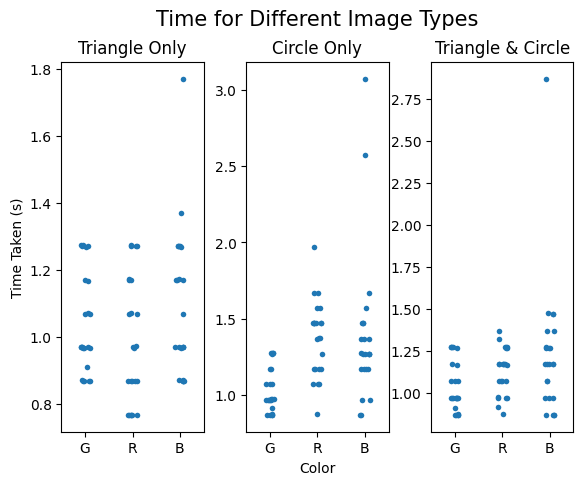

In [95]:
#https://stackoverflow.com/questions/67051277/plotting-two-seaborn-graphs-in-subplots
#https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
#https://stackoverflow.com/questions/24618862/how-to-change-the-order-of-factor-plot-in-seaborn
#https://www.geeksforgeeks.org/how-to-set-a-single-main-title-for-all-the-subplots-in-matplotlib/

#Creates a plot of the different shapes as a side by side comparison.

fig, axes = plt.subplots(1,3)
fig.suptitle('Time for Different Image Types', fontsize = 15)

#Creates a categorical data plot of the triangle color distribution.
sns.stripplot (x = triangle_only, y = triangles_time, s=4, ax = axes[0], order = ['G', 'R', 'B'])
axes[0].set_title("Triangle Only")
axes[0].set_ylabel("Time Taken (s)")

#Creates a categorical data plot of the circle color distribution.
sns.stripplot (x = circle_only, y = circles_time, s=4, ax = axes[1], order = ['G', 'R', 'B'])
axes[1].set_title("Circle Only")
axes[1].set_xlabel("Color")

#Creates a categorical data plot of the triangle/circle color distribution.
sns.stripplot (x = tricir_both, y = both_time, s=4, ax = axes [2], order = ['G', 'R', 'B'])
axes[2].set_title("Triangle & Circle")

#Adjusts the spacing parameters.
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.87, wspace=0.3, hspace=0.4)

Text(0.5, 0, 'Shape')

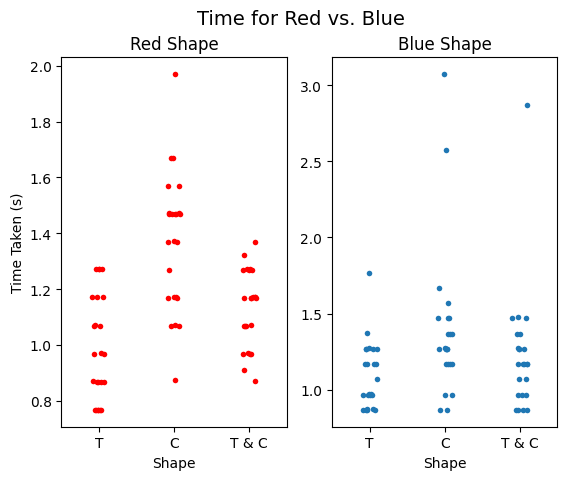

In [94]:
#Creates a plot of the different colors as a side by side comparison.
fig, axes = plt.subplots(1,2)
fig.suptitle('Time for Red vs. Blue', fontsize = 14)

#Creates a categorical data plot of the red shape distribution.
sns.stripplot (x = red_shape, y = red_time,  s=4, ax = axes[0], color = 'red', order = ['T', 'C', 'T & C'])
axes[0].set_title("Red Shape")
axes[0].set_ylabel("Time Taken (s)")
axes[0].set_xlabel("Shape")

#Creates a categorical data plot of the blue shape distribution.
sns.stripplot (x = blue_shape, y = blue_time, s=4, ax = axes[1], order = ['T', 'C', 'T & C'])
axes[1].set_title("Blue Shape")
axes[1].set_xlabel("Shape")

In [96]:
#Shows what the csv file looks like after cleaning it up.
df.head(10)

,triangle_pos,triangle_color,blue_circle_pos,red_circle_pos,Real_Trials.started,Real_Trials.stopped,Time Taken,Red Circle Present,Blue Circle Present,Red Triangle Present,Blue Triangle Present,Image Type
66,"(0, 0.25)",g,0.0,"(-0.1875, -0.1875)",72.249251,73.323753,0.874501,1,0,0,0,Red Circle
67,"(-0.1875, 0.1875)",g,"(0.25, 0)",0.0,73.323920,74.793130,1.269210,0,1,0,0,Blue Circle
68,"(-0.1875, 0.1875)",r,0.0,"(0.25, 0)",74.793295,76.065085,1.071789,1,0,1,0,Red Triangle & Circle
69,"(-0.1875, 0.1875)",g,0.0,"(0.25, 0)",76.065247,77.835274,1.570026,1,0,0,0,Red Circle
70,"(0.1875, 0.1875)",b,0.0,0.0,77.835474,79.104653,1.069179,0,0,0,1,Blue Triangle
71,"(0.1875, -0.1875)",b,0.0,0.0,79.104812,80.272491,0.967678,0,0,0,1,Blue Triangle
72,"(0.1875, 0.1875)",g,"(0, -0.25)",0.0,80.272653,82.040856,1.568204,0,1,0,0,Blue Circle
73,"(0.1875, -0.1875)",b,"(-0.25, 0)",0.0,82.041020,83.510420,1.269400,0,1,0,1,Blue Triangle & Circle
74,"(-0.25, 0)",g,0.0,"(0.1875, -0.1875)",83.510585,84.782666,1.072081,1,0,0,0,Red Circle
75,"(0.25, 0)",g,"(-0.1875, 0.1875)",0.0,84.782828,85.851472,0.868644,0,1,0,0,Blue Circle


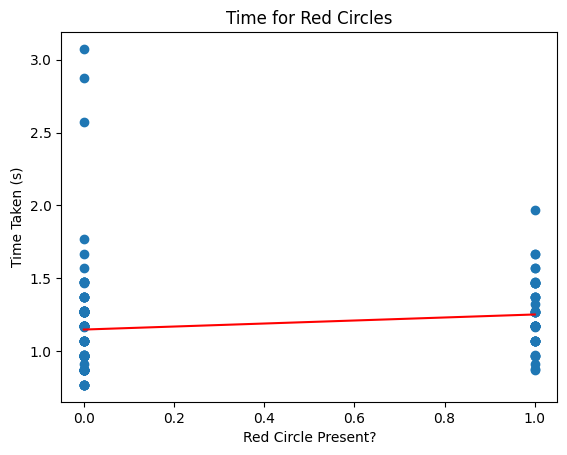

In [125]:
#Creates a line of best fit for the presence/absence of a red circle and time taken.
RedCX = df[['Red Circle Present']]
RedCY = df[['Time Taken']]
linear = LinearRegression ()
linear.fit(RedCX, RedCY)

#Scatters the data for presence/absence of a red circle, with a line of best fit.
plt.scatter(RedCX, RedCY)
time_pred = linear.predict(RedCX)
plt.plot (RedCX, time_pred, color = 'red')
plt.xlabel("Red Circle Present?")
plt.ylabel("Time Taken (s)")
plt.title ("Time for Red Circles")
plt.show()

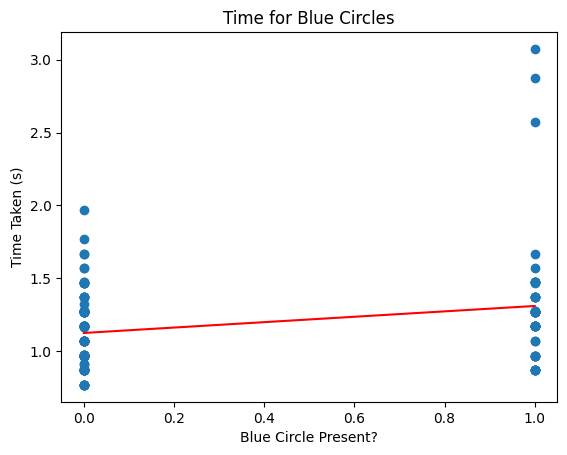

In [124]:
#Creates a line of best fit for the presence/absence of a blue circle and time taken.
BlueCX = df[['Blue Circle Present']]
BlueCY = df[['Time Taken']]
linear = LinearRegression ()
linear.fit(BlueCX, BlueCY)

#Scatters the data for presence/absence of a blue circle, with a line of best fit.
plt.scatter(BlueCX, BlueCY)
time_pred = linear.predict(BlueCX)
plt.plot (BlueCX, time_pred, color = 'red')
plt.xlabel("Blue Circle Present?")
plt.ylabel("Time Taken (s)")
plt.title ("Time for Blue Circles")
plt.show()

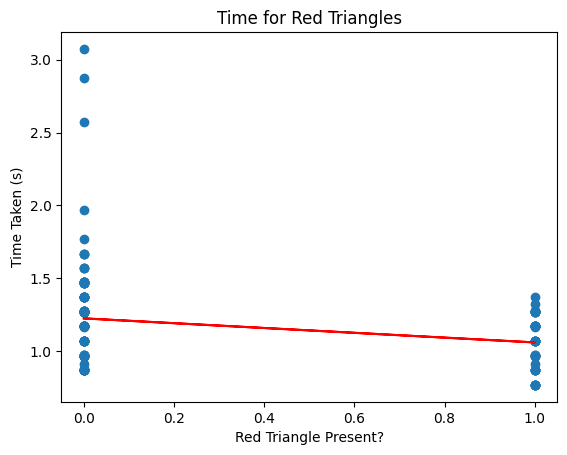

In [123]:
#Creates a line of best fit for the presence/absence of a red triangle and time taken.
RedTX = df[['Red Triangle Present']]
RedTY = df[['Time Taken']]
linear = LinearRegression ()
linear.fit(RedTX, RedTY)

#Scatters the data for presence/absence of a red triangle, with a line of best fit.
plt.scatter(RedTX, RedTY)
time_pred = linear.predict(RedTX)
plt.plot (RedTX, time_pred, color = 'red')
plt.xlabel("Red Triangle Present?")
plt.ylabel("Time Taken (s)")
plt.title ("Time for Red Triangles")
plt.show()

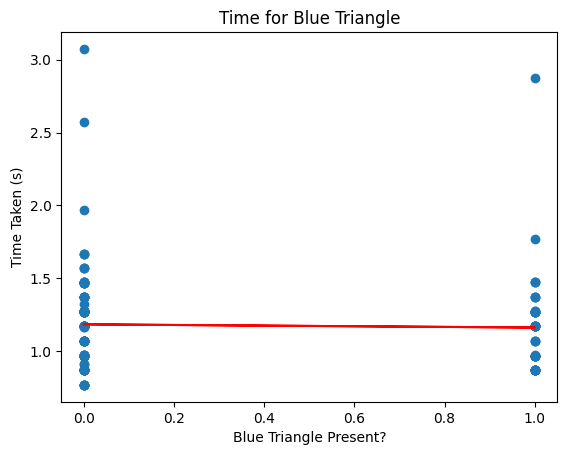

In [122]:
#Creates a line of best fit for the presence/absence of a blue triangle and time taken.
BlueTX = df[['Blue Triangle Present']]
BlueTY = df[['Time Taken']]
linear = LinearRegression ()
linear.fit(BlueTX, BlueTY)

#Scatters the data for presence/absence of a blue triangle, with a line of best fit.
plt.scatter(BlueTX, BlueTY)
time_pred = linear.predict(BlueTX)
plt.plot (BlueTX, time_pred, color = 'red')
plt.xlabel("Blue Triangle Present?")
plt.ylabel("Time Taken (s)")
plt.title ("Time for Blue Triangle")
plt.show()

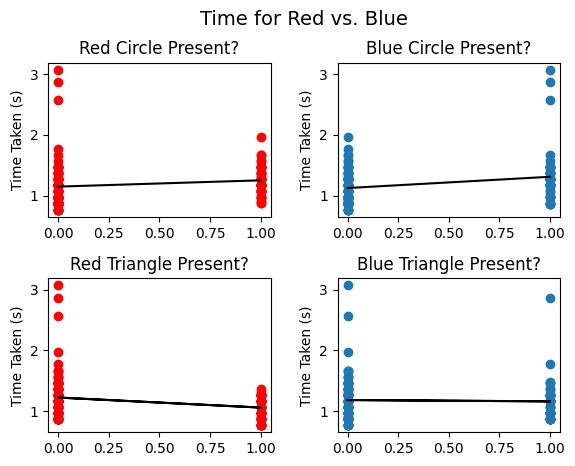

In [121]:
#Creates a categorical data plot of the color & shape distribution, as subplots all together.
fig, axes = plt.subplots(2, 2)
fig.suptitle('Time for Red vs. Blue', fontsize = 14)

#Subplot for red circles.
axes[0][0].scatter(RedCX, RedCY, color = 'red')
linear.fit(RedCX, RedCY)
time_predRedC = linear.predict(RedCX)
axes[0][0].plot (RedCX, time_predRedC, color = 'black')
axes[0][0].set_title("Red Circle Present?")
axes[0][0].set_ylabel("Time Taken (s)")

#Subplot for blue circles.
axes[0][1].scatter(BlueCX, BlueCY)
linear.fit(BlueCX, BlueCY)
time_predBlueC = linear.predict(BlueCX)
axes[0][1].plot (BlueCX, time_predBlueC, color = 'black')
axes[0][1].set_title("Blue Circle Present?")
axes[0][1].set_ylabel("Time Taken (s)")

#Subplot for red triangles.
axes[1][0].scatter(RedTX, RedTY, color = 'red')
linear.fit(RedTX, RedTY)
time_predRedT = linear.predict(RedTX)
axes[1][0].plot (RedTX, time_predRedT, color = 'black')
axes[1][0].set_title("Red Triangle Present?")
axes[1][0].set_ylabel("Time Taken (s)")

#Subplot for blue trirangles.
axes[1][1].scatter(BlueTX, BlueTY)
linear.fit(BlueTX, BlueTY)
time_predBlueT = linear.predict(BlueTX)
axes[1][1].plot (BlueTX, time_predBlueT, color = 'black')
axes[1][1].set_title("Blue Triangle Present?")
axes[1][1].set_ylabel("Time Taken (s)")

#Adjusts the spacing parameters.
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.87, wspace=0.3, hspace=0.4)

In [126]:
#Finds the average time taken for each image type.

#Establishes the variables
all_green_avg = 0
red_circle_avg = 0
red_triangle_avg = 0
red_tricir_avg = 0
blue_circle_avg = 0
blue_triangle_avg = 0
blue_tricir_avg = 0

for ii in range (len(triangle_pos)):
  if triangle_color [ii] == 'g':
    if red_pos[ii] == '0.0':
      if blue_pos[ii] == '0.0':
        #If the triangle is green and there is no red/blue circles, add the time to all green.
        all_green_avg += time_taken_seconds [ii]
      else:
        #If the triangle is green and there is a blue circle, add the time to blue circle.
        blue_circle_avg += time_taken_seconds [ii]
    else:
        #If the triangle is green and there is a red circle, add the time to red circle.
        red_circle_avg += time_taken_seconds [ii]
  elif triangle_color [ii] == 'r':
    if red_pos[ii] == '0.0':
      if blue_pos[ii] == '0.0':
        #If the triangle is red and there is no red circle, add the time to red triangle.
        red_triangle_avg += time_taken_seconds [ii]
    else:
      #If the triangle is red and there is a red circle, add the time to red tricir
      red_tricir_avg += time_taken_seconds [ii]
  else:
    if blue_pos[ii] == '0.0':
      #If the triangle is blue and there is no blue circle, add the time to blue triangle.
      blue_triangle_avg += time_taken_seconds [ii]
    else:
      #If the triangle is blue and there is a blue circle, add the time to blue tricir.
      blue_tricir_avg += time_taken_seconds [ii]

#Finds the average for each image type.
image_type_list = [all_green_avg, red_circle_avg, red_triangle_avg, red_tricir_avg, blue_circle_avg, blue_triangle_avg, blue_tricir_avg]
final_avg = []

#Each image type occurs 8 times (each triangle position)
for image in image_type_list:
  final_avg.append (image/8)

Text(0.5, 1.0, 'Time Taken Across Image Types')

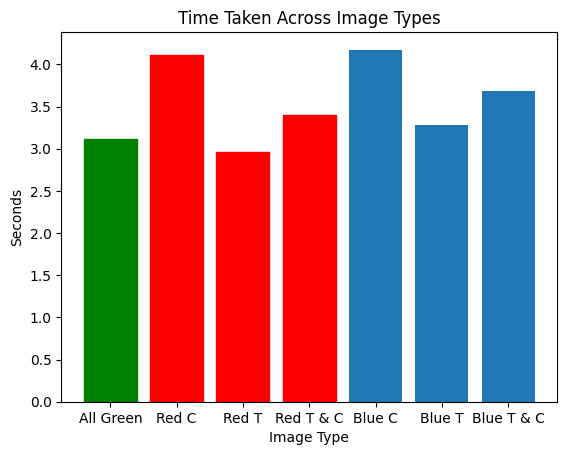

In [127]:
#https://www.tutorialspoint.com/setting-different-bar-color-in-matplotlib
#Creates a bar graph of the different images average time taken.

image_options = ['All Green', 'Red C', 'Red T', 'Red T & C', 'Blue C', 'Blue T', 'Blue T & C']

bargraph = plt.bar (image_options, final_avg)

#Changes the bar colors to reflect the image seen.
bargraph[0].set_color('green')
for ii in range (3):
  bargraph[ii+1].set_color ('red')
plt.xlabel("Image Type")
plt.ylabel("Seconds")
plt.title("Time Taken Across Image Types")